[Social Network Ads] Test Accuracy: 0.8625
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



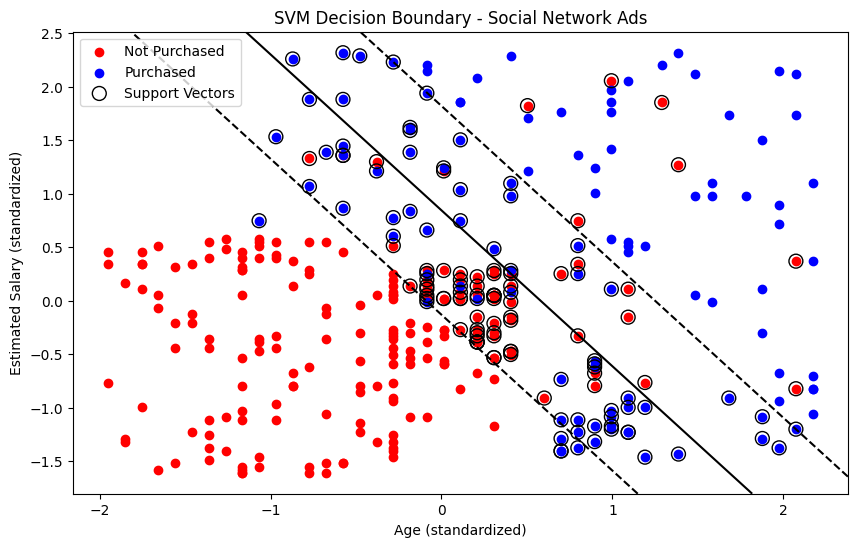

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Evaluate
y_pred = svm.predict(X_test_scaled)
print("[Social Network Ads] Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot decision boundary
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(10,6))
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Not Purchased')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Purchased')
    ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.xlabel('Age (standardized)')
    plt.ylabel('Estimated Salary (standardized)')
    plt.title('SVM Decision Boundary - Social Network Ads')
    plt.legend()
    plt.show()

plot_svm_decision_boundary(X_train_scaled, y_train, svm)


[Social Network Ads] Test Accuracy (RBF): 0.925
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



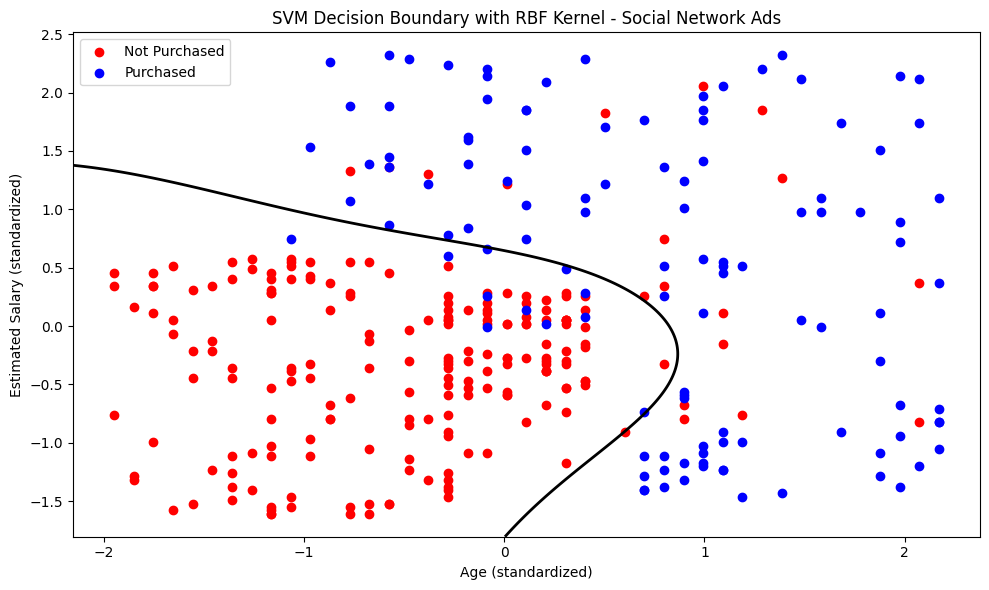

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel (can also use kernel='poly' for polynomial)
svm = SVC(kernel='rbf', gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluation
y_pred = svm.predict(X_test_scaled)
print("[Social Network Ads] Test Accuracy (RBF):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decision boundary plotting
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(10,6))

    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Not Purchased')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Purchased')

    ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 300)
    yy = np.linspace(ylim[0], ylim[1], 300)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[0], linewidths=2)
    plt.xlabel('Age (standardized)')
    plt.ylabel('Estimated Salary (standardized)')
    plt.title('SVM Decision Boundary with RBF Kernel - Social Network Ads')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_svm_decision_boundary(X_train_scaled, y_train, svm)


[Social Network Ads] Test Accuracy (poly): 0.875
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        52
           1       1.00      0.64      0.78        28

    accuracy                           0.88        80
   macro avg       0.92      0.82      0.85        80
weighted avg       0.90      0.88      0.87        80



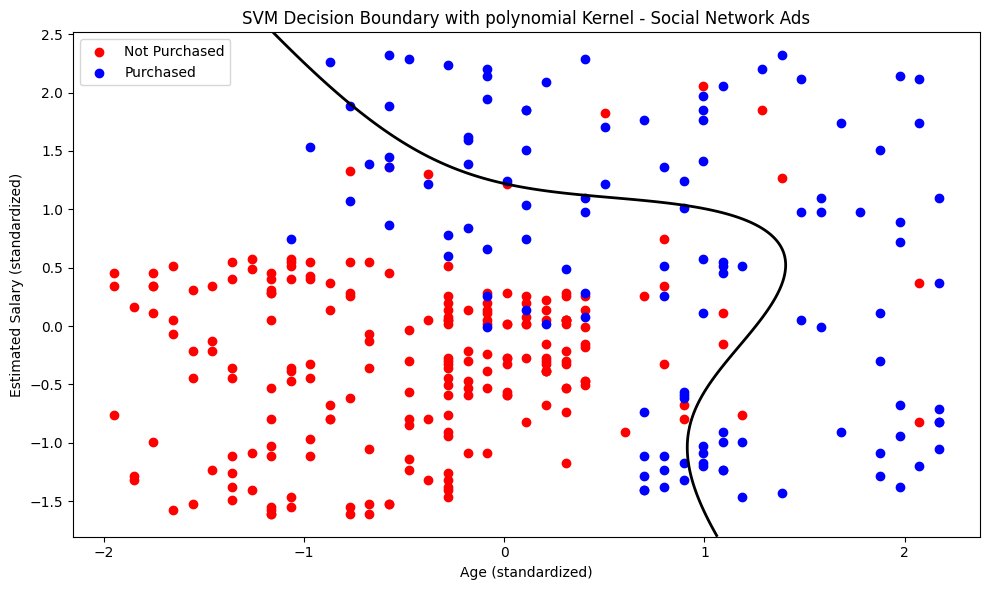

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel (can also use kernel='poly' for polynomial)
svm = SVC(kernel='poly', degree=3,gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluation
y_pred = svm.predict(X_test_scaled)
print("[Social Network Ads] Test Accuracy (poly):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decision boundary plotting
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(10,6))

    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Not Purchased')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Purchased')

    ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 300)
    yy = np.linspace(ylim[0], ylim[1], 300)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[0], linewidths=2)
    plt.xlabel('Age (standardized)')
    plt.ylabel('Estimated Salary (standardized)')
    plt.title('SVM Decision Boundary with polynomial Kernel - Social Network Ads')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_svm_decision_boundary(X_train_scaled, y_train, svm)
